# Data analys

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import warnings
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score


from main import producer
import json
import time
import config

In [3]:
df = pd.read_csv("./data/netflix_titles.csv")

In [4]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df.shape

(8807, 12)

In [8]:
df = df.drop('show_id', axis = 1)

In [9]:
df['director'] = df['director'].fillna(df['director'].mode()[0])
df['cast'] = df['cast'].fillna(df['cast'].mode()[0])
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])

In [10]:
df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
df['date_added'].value_counts()

date_added
January 1, 2020       119
November 1, 2019       89
March 1, 2018          75
December 31, 2019      74
October 1, 2018        71
                     ... 
February 2, 2017        1
September 11, 2019      1
May 17, 2015            1
June 5, 2018            1
October 14, 2017        1
Name: count, Length: 1767, dtype: int64

In [14]:
df_new = df.drop(['listed_in', 'title', 'director', 'cast', 'country', 'description', 'date_added'], axis=1)

In [15]:
df_new

,type,release_year,rating,duration
0,Movie,2020,PG-13,90 min
1,TV Show,2021,TV-MA,2 Seasons
2,TV Show,2021,TV-MA,1 Season
3,TV Show,2021,TV-MA,1 Season
4,TV Show,2021,TV-MA,2 Seasons
...,...,...,...,...
8802,Movie,2007,R,158 min
8803,TV Show,2018,TV-Y7,2 Seasons
8804,Movie,2009,R,88 min
8805,Movie,2006,PG,88 min


In [16]:
df_new = pd.get_dummies(df_new, columns=['type'], dtype=int)
df_new = pd.get_dummies(df_new, columns=['rating'], dtype=int)
df_new = pd.get_dummies(df_new, columns=['duration'], dtype=int)

In [17]:
df_new

,release_year,type_Movie,type_TV Show,rating_66 min,rating_74 min,rating_84 min,rating_G,rating_NC-17,rating_NR,rating_PG,...,duration_90 min,duration_91 min,duration_92 min,duration_93 min,duration_94 min,duration_95 min,duration_96 min,duration_97 min,duration_98 min,duration_99 min
0,2020,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2021,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,2007,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8803,2018,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8804,2009,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8805,2006,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_new = df_new.drop(['type_TV Show'], axis=1)

# Data preprocessing

In [19]:
X = df_new.drop(['type_Movie'], axis = 1)
y = df_new['type_Movie']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=100) 

# Machine Learning

# Model №1 - XGBoost

In [67]:
# def send_metric_to_kafka(iteration, log_loss):
#     """Отправка ошибки в Kafka"""
#     data = {'iteration': iteration, 'log_loss': log_loss}
#     producer.produce('training_metrics', key='log_loss', value=json.dumps(data))
#     producer.flush()
#     print(f"Sent to Kafka: {data}")

# # Callback для логирования
# def log_callback(env):
#     iteration = env.iteration
#     log_loss = env.evaluation_result_list[1][1]  # Ошибка на тесте
#     print(f"Iteration {iteration}, Log Loss: {log_loss:.4f}")
#     send_metric_to_kafka(iteration, log_loss)

class KafkaCallback(xgb.callback.TrainingCallback):
    def after_iteration(self, model, epoch, evals_log):
        data = {
            'iteration': epoch,
            'log_loss': evals_log['eval']['logloss'][-1]
        }
        producer.produce(config.topic, key='log_loss', value=json.dumps(data))
        producer.flush()
        print(f"Sent to Kafka: {data}")
        time.sleep(1)
        return False  # Возвращаем False, чтобы продолжить обучение

In [75]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)  

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Параметры для XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': 0.1,
    'max_depth': 3
}


bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=200,
    evals=[(dtest, 'eval')],
    early_stopping_rounds=10,  
    callbacks=[KafkaCallback()]  
)

Sent to Kafka: {'iteration': 0, 'log_loss': 0.5420631905802713}
[0]	eval-logloss:0.54206
Sent to Kafka: {'iteration': 1, 'log_loss': 0.47900442546215916}
[1]	eval-logloss:0.47900
Sent to Kafka: {'iteration': 2, 'log_loss': 0.4286548912164347}
[2]	eval-logloss:0.42865
Sent to Kafka: {'iteration': 3, 'log_loss': 0.3873484267391944}
[3]	eval-logloss:0.38735
Sent to Kafka: {'iteration': 4, 'log_loss': 0.35131005251042285}
[4]	eval-logloss:0.35131
Sent to Kafka: {'iteration': 5, 'log_loss': 0.3214881037373548}
[5]	eval-logloss:0.32149
Sent to Kafka: {'iteration': 6, 'log_loss': 0.29607186229942517}
[6]	eval-logloss:0.29607
Sent to Kafka: {'iteration': 7, 'log_loss': 0.27373713263949345}
[7]	eval-logloss:0.27374
Sent to Kafka: {'iteration': 8, 'log_loss': 0.2528845050199168}
[8]	eval-logloss:0.25288
Sent to Kafka: {'iteration': 9, 'log_loss': 0.23573832997556804}
[9]	eval-logloss:0.23574
Sent to Kafka: {'iteration': 10, 'log_loss': 0.2199265747766264}
[10]	eval-logloss:0.21993
Sent to Kafka:

In [58]:
# Прогнозирование на тренировочных и тестовых данных
train_preds = bst.predict(dtrain)
test_preds = bst.predict(dtest)

In [59]:
# Преобразуем вероятности в бинарные метки (порог 0.5)
train_preds_binary = np.round(train_preds)
test_preds_binary = np.round(test_preds)

In [60]:
# Вычисление точности
train_accuracy = accuracy_score(y_train, train_preds_binary)
test_accuracy = accuracy_score(y_test, test_preds_binary)

# Вывод результатов
print('Score on train data = ', round(train_accuracy, 4))
print('Score on test data = ', round(test_accuracy, 4))

Score on train data =  0.9922
Score on test data =  0.9921


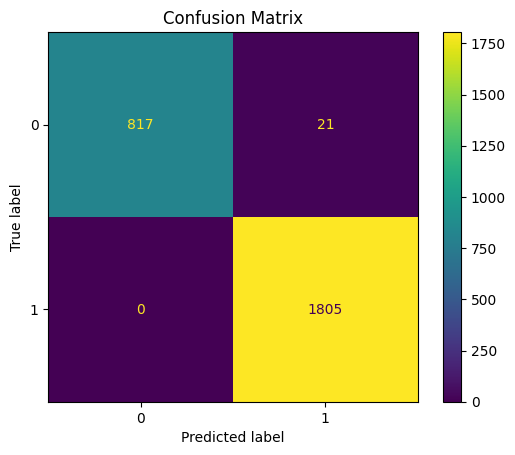

In [61]:
# Вычисление матрицы ошибок
cm = confusion_matrix(y_test, test_preds_binary)

# Отображение матрицы ошибок
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.viridis)
plt.title('Confusion Matrix')
plt.show()